**Brian Blaylock**  
**April 16, 2019**

# GLM GOES-16 and GOES-17
There appears to be good agreement between GOES-16 and GOES-17 GLM instrument observed flashes.

In [1]:
from datetime import datetime, timedelta
import os
import numpy as np
import xarray
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_GOES.get_GOES import get_GOES_nearesttime
from BB_maps.my_cartopy import proj_HRRR, extent_HRRR, PC

In [2]:
# Pick a data
DATE = datetime(2019, 4, 10, 7, 30)

# Grab all GLM files for +/- 5 mins of that datetime...
g16 = get_GOES_nearesttime(DATE, product='GLM', satellite=16,
                           window=5, verbose=False)
g17 = get_GOES_nearesttime(DATE, product='GLM', satellite=17,
                           window=5, verbose=False)

Requested 2019-04-10 07:30:00	satellite: GOES-16	Product: GLM
Requested 2019-04-10 07:30:00	satellite: GOES-17	Product: GLM


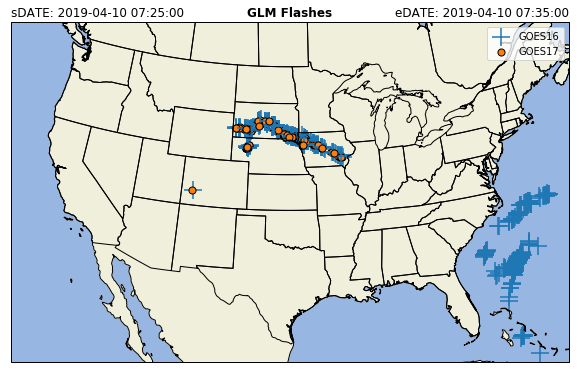

In [3]:
plt.figure(figsize=[10, 8])
ax = plt.axes(projection=proj_HRRR())

# Set the extent to the HRRR domain
extent_HRRR(ax)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
#ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))

for f16, f17 in zip(g16['Files'], g17['Files']):
    G16 = xarray.open_dataset(f16)
    G17 = xarray.open_dataset(f17)
    
    p16 = plt.scatter(G16['flash_lon'], G16['flash_lat'],
                marker='+', s=300,
                c='tab:blue', transform=PC)
    p17 = plt.scatter(G17['flash_lon'], G17['flash_lat'],
                marker='o', s=50,
                color='tab:orange', edgecolor='k',transform=PC)

plt.title('sDATE: %s' % g16['Range'][0], loc='left'); 
plt.title('eDATE: %s' % g16['Range'][1], loc='right') 
plt.title('GLM Flashes', fontweight='semibold')
plt.legend([p16, p17], ['GOES16', 'GOES17'])

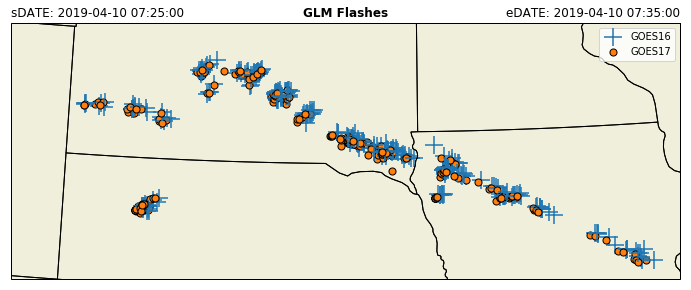

In [4]:
plt.figure(figsize=[12, 5])
ax = plt.axes(projection=proj_HRRR())

# Set the extent to the HRRR domain
ax.set_extent([-105, -91, 41, 45], crs=PC)

ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
#ax.add_feature(cfeature.LAKES.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))

for f16, f17 in zip(g16['Files'], g17['Files']):
    G16 = xarray.open_dataset(f16)
    G17 = xarray.open_dataset(f17)
    
    p16 = plt.scatter(G16['flash_lon'], G16['flash_lat'],
                marker='+', s=300,
                c='tab:blue', transform=PC)
    p17 = plt.scatter(G17['flash_lon'], G17['flash_lat'],
                marker='o', s=50,
                color='tab:orange', edgecolor='k',transform=PC)

plt.title('sDATE: %s' % g16['Range'][0], loc='left'); 
plt.title('eDATE: %s' % g16['Range'][1], loc='right') 
plt.title('GLM Flashes', fontweight='semibold')
plt.legend([p16, p17], ['GOES16', 'GOES17'])